<a href="https://colab.research.google.com/github/Andrewvlad/ML-and-AI/blob/main/Shortest_Route%7CDFS_BFS_A_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Shortest Route
---
Below you will find three solutions for the shortest route problem (DFS, BFS, and A\*), using the map of Romania below and the straight-line distance to the destination (*Bucharest*) as the heuristic function, h(n). 


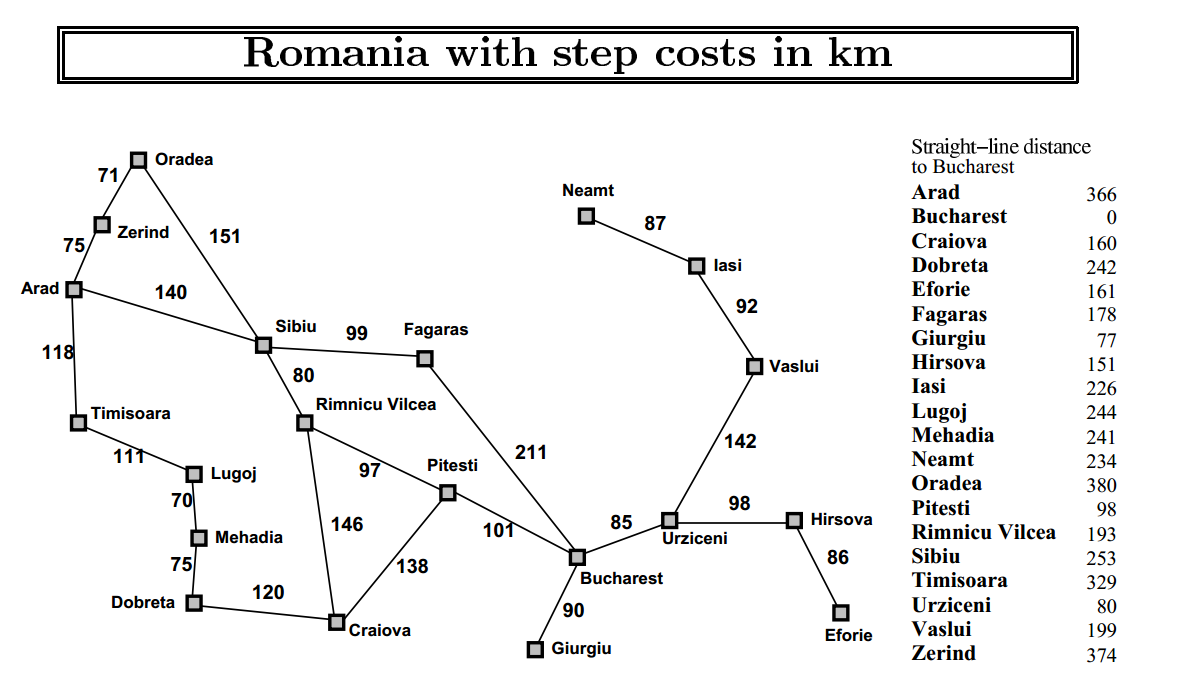

##Code

In [ ]:
distances = {"Arad": 366,
             "Bucharest": 0,
             "Craiova": 160,
             "Drobeta": 242,
             "Eforie": 161,
             "Fagaras": 178,
             "Giurgiu": 77,
             "Hirsova": 151,
             "Iasi": 226,
             "Lugoj": 244,
             "Mehadia": 241,
             "Neamt": 234,
             "Oradea": 380,
             "Pitesti": 98,
             "Rimnicu Vilcea": 193,
             "Sibiu": 253,
             "Timisoara": 329,
             "Urziceni": 80,
             "Vaslui": 199,
             "Zerind": 374}

graph = {"Arad": ['Sibiu', 'Zerind', 'Timisoara'],
         "Bucharest": ['Fagaras', 'Giurgiu', 'Pitesti', 'Urziceni'],
         "Craiova": ['Drobeta', 'Rimnicu Vilcea', 'Pitesti'],
         "Drobeta": ['Craiova', 'Mehadia'],
         "Eforie": ['Hirsova'],
         "Fagaras": ['Sibiu', 'Bucharest'],
         "Giurgiu": ['Bucharest'],
         "Hirsova": ['Eforie', 'Urziceni'],
         "Iasi": ['Neamt', 'Vaslui'],
         "Lugoj": ['Mehadia', 'Timisoara'],
         "Mehadia": ['Drobeta', 'Lugoj'],
         "Neamt": ['Iasi'],
         "Oradea": ['Sibiu', 'Zerind'],
         "Pitesti": ['Bucharest', 'Craiova', 'Rimnicu Vilcea'],
         "Rimnicu Vilcea": ['Craiova', 'Pitesti', 'Sibiu'],
         "Sibiu": ['Arad', 'Fagaras', 'Oradea', 'Rimnicu Vilcea'],
         "Timisoara": ['Arad', 'Lugoj'],
         "Urziceni": ['Bucharest', 'Hirsova', 'Vaslui'],
         "Vaslui": ['Iasi', 'Urziceni'],
         "Zerind": ['Arad', 'Oradea']}

graph_ext = {"Arad": [('Sibiu', 140), ('Zerind', 75), ('Timisoara', 118)],
         "Bucharest": [('Fagaras', 211), ('Giurgiu', 90), ('Pitesti', 101), ('Urziceni', 85)],
         "Craiova": [('Drobeta', 120), ('Rimnicu Vilcea', 146), ('Pitesti', 138)],
         "Drobeta": [('Craiova', 120), ('Mehadia', 75)],
         "Eforie": [('Hirsova', 86)],
         "Fagaras": [('Sibiu', 99), ('Bucharest', 211)],
         "Giurgiu": [('Bucharest', 90)],
         "Hirsova": [('Eforie', 86), ('Urziceni', 98)],
         "Iasi": [('Neamt', 87), ('Vaslui', 92)],
         "Lugoj": [('Mehadia', 70), ('Timisoara', 111)],
         "Mehadia": [('Drobeta', 75), ('Lugoj', 70)],
         "Neamt": [('Iasi', 87)],
         "Oradea": [('Sibiu', 151), ('Zerind', 71)],
         "Pitesti": [('Bucharest', 101), ('Craiova', 138), ('Rimnicu Vilcea', 97)],
         "Rimnicu Vilcea": [('Craiova', 146), ('Pitesti', 97), ('Sibiu', 80)],
         "Sibiu": [('Arad', 140), ('Fagaras', 99), ('Oradea', 151), ('Rimnicu Vilcea', 80)],
         "Timisoara": [('Arad', 118), ('Lugoj', 111)],
         "Urziceni": [('Bucharest', 85), ('Hirsova', 98), ('Vaslui', 142)],
         "Vaslui": [('Iasi', 92), ('Urziceni', 142)],
         "Zerind": [('Arad', 75), ('Oradea', 71)]}

algorithms = {'A': "for A*",
              'B': "for BFS",
              'D' : "for DFS"}

purpose_string = 'The purpose of this app is to find the shortest path to Bucharest. '
invalid_input = 'Invalid input! Please try again. \n'
depart_info_string = 'Destination: Bucharest\nSelect a starting location: \n\t -'
depart_input_string = 'Departing from: '
algorithm_info_string = 'Select an algorithm: \n\t -'
algorithm_input_string = 'Algorithm: '


def get_input(user_input, table):
    return user_input if user_input in table else False  #check if input is valid


def select_city(error=False):
    if error:  #if the user put an invalid input
        print(invalid_input)  #print an error message 
    print(depart_info_string, '\n\t - '.join([location for location in graph]))  #print all of the locations
    val = get_input(input(depart_input_string), graph)  #get the user's input 
    return val if val else select_city(True)  #return the city


def select_algorithm(place, error=False):
    if error:  #if the user put an invalid input
        print(invalid_input)  #print an error message 
    print(algorithm_info_string, '\n\t - '.join([f'{key} {value}' for key, value in algorithms.items()])) #print all of the algorithms
    val = get_input(input(algorithm_input_string), algorithms)  #get the user's input 
    return a_star([place]) if val == 'A' else bfs([[place]]) if val == 'B' else dfs(graph, [place]) if val == 'D' else select_algorithm(place, True)  #call the algorithm 


def bfs(q, end="Bucharest"):
    p = q.pop(0)  #remove a route from the queue 
    return p if p[-1] == end else bfs(  #if Bucharest has been reached, return the route 
    # else add to the queue all potential routes from the current node and run again 
            q + list(p + [adjacent] for adjacent in graph.get(p[-1], []) if adjacent not in p))  #if the node has not yet been traversed 


def dfs(g, route, end="Bucharest"):
    for adjacent in g.get(route[-1]):  #for all potential routes from the current node
        if adjacent not in route:  #if the node has not yet been traversed 
            return route + [end] if adjacent == end else dfs(g, route + [adjacent])  #if Bucharest has been reached, return the route, else run deeper 
    # else if no potential routes that have not yet been traversed
    return dfs(g, route[:-1]) if not g.get(route[-2]).remove(route[-1]) else -1  #remove the current node and walk it back one step 


def a_star(route, end="Bucharest"):
    return route if route[-1] == end else a_star(  #if Bucharest has been reached, return the route 
    # else run deeper on the node closest to Bucharest
        route + [min(list([[distances.get(x), x] for x in graph.get(route[-1]) if x not in route]))[1]])  #if the node has not yet been traversed 


def distance_calculator(route, val=0):
    print(f'Route: {route[0]}', end='')  #print the starting location 
    for i in range(1, len(route)):  #for index from 1 -> route length
        for adjacent in graph_ext.get(route[i-1]):  #for adjacent to the route at the index prior 
            if adjacent[0] == route[i]:  #if the adjacent matches the current index 
                val += adjacent[1]  #add to val the distance to the adjacent 
                print(f' -> {adjacent[0]}', end='')  #print the route 
    print(f"\nTotal trip distance: {val}km\n")  #print the total distance 


def main():
    print(purpose_string)  #print the starting information 
    distance_calculator(select_algorithm(select_city()))  #run the game 
    if (input('Would you like to go again (Y/N)? ')=='Y'):  #ask if they want to play again
        main()  #play again



Run Code:

In [ ]:
main()

The purpose of this app is to find the shortest path to Bucharest. 
Destination: Bucharest
Select a starting location: 
	 - Arad
	 - Bucharest
	 - Craiova
	 - Drobeta
	 - Eforie
	 - Fagaras
	 - Giurgiu
	 - Hirsova
	 - Iasi
	 - Lugoj
	 - Mehadia
	 - Neamt
	 - Oradea
	 - Pitesti
	 - Rimnicu Vilcea
	 - Sibiu
	 - Timisoara
	 - Urziceni
	 - Vaslui
	 - Zerind
Departing from: Lugoj
Select an algorithm: 
	 - A for A*
	 - B for BFS
	 - D for DFS
Algorithm: A*
Invalid input! Please try again. 

Select an algorithm: 
	 - A for A*
	 - B for BFS
	 - D for DFS
Algorithm: A
Route: Lugoj -> Mehadia -> Drobeta -> Craiova -> Pitesti -> Bucharest
Total trip distance: 504km



Tests:

In [ ]:
distance_calculator(a_star(['Arad']))
distance_calculator(a_star(['Bucharest']))
distance_calculator(bfs([['Craiova']]))
distance_calculator(bfs([['Eforie']]))
distance_calculator((dfs(graph, ['Drobeta'])))
distance_calculator((dfs(graph, ['Neamt'])))

Route: Arad -> Sibiu -> Fagaras -> Bucharest
Total trip distance: 450km

Route: Bucharest
Total trip distance: 0km

Route: Craiova -> Pitesti -> Bucharest
Total trip distance: 239km

Route: Eforie -> Hirsova -> Urziceni -> Bucharest
Total trip distance: 269km

Route: Drobeta -> Craiova -> Rimnicu Vilcea -> Pitesti -> Bucharest
Total trip distance: 464km

Route: Neamt -> Iasi -> Vaslui -> Urziceni -> Bucharest
Total trip distance: 406km

